# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  >
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

# make the results repeatable
np.random.seed(1234)

In [ ]:
def random_tour(n):
    """Create a random tour"""

    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[6, 2, 3, 9, 0, 8, 4, 7, 5, 1]

In [ ]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [ ]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

tour = random_tour(10)
tour_length(tsp, tour)

np.float64(4.7534330422614515)

Tour length: 4.75


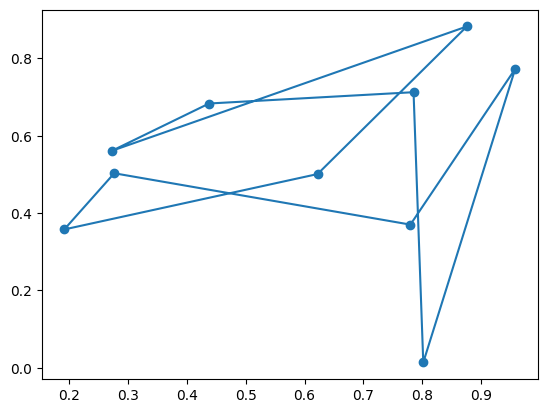

In [ ]:
def show_tsp(tsp, tour = None):
    """display the traveling salesman problem and a tour."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"])

    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")

        pos_ = pos.reindex(tour)
        pos_ = pd.concat([pos_, pos_.head(1)])
        plt.plot(pos_["x"], pos_["y"])

    plt.show()

show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [ ]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
%R if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

d = tsp["dist"]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘iterators’, ‘foreach’

trying URL 'http://cran.us.r-project.org/src/contrib/iterators_1.0.14.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/foreach_1.5.2.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/TSP_1.2-5.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpUPmDQR/downloaded_packages’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/microbenchmark_1.5.0.tar.gz'
Content type 'application/x-gzip' length 61673 bytes (60 KB)
downloaded 60 KB


The downloaded source packages are in
	‘/tmp/RtmpUPmDQR/downloaded_packages’


Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [ ]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt_rep_100’ for 10 cities
tour length: 2.763574 


In addition: Warning message:
executing %dopar% sequentially: no parallel backend registered 


Tour length: 2.76


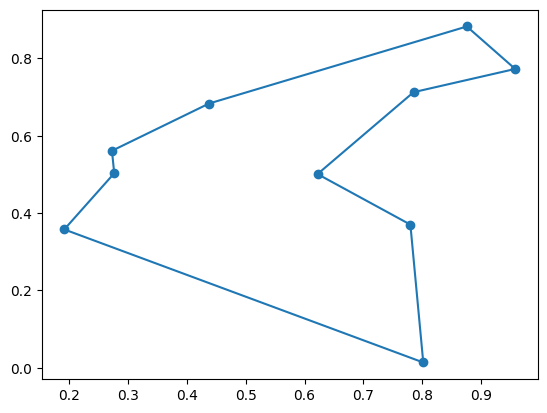

In [ ]:
show_tsp(tsp, tour)

How long does it take to solve the problem 100 times?

In [ ]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr     min       lq     mean   median       uq     max neval
 tsp <- TSP(d) 224.751 240.3355 270.8705 253.2155 283.6705 720.222   100


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

⛰️ Local optimum reached after 4 steps. Cost = 2.6663

Best tour found: [7, 9, 0, 2, 8, 3, 6, 1, 5, 4]
Best cost: 2.6663
Runtime: 0.72 ms
Tour length: 2.67


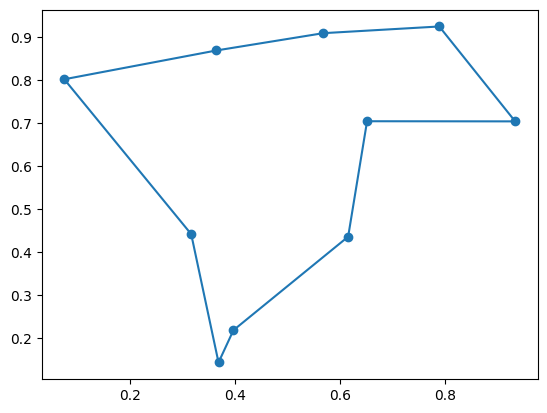

In [ ]:
# Code goes here
import numpy as np
import random
import time

def steepest_ascent_hill_climbing(tsp, max_steps=1000, verbose=False):
    n = len(tsp["dist"])
    current_tour = random_tour(n)
    current_cost = tour_length(tsp, current_tour)
    best_tour, best_cost = current_tour.copy(), current_cost

    for step in range(max_steps):
        improved = False
        for i in range(n - 1):
            for j in range(i + 1, n):
                new_tour = current_tour.copy()
                new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
                new_cost = tour_length(tsp, new_tour)
                if new_cost < best_cost:
                    best_cost = new_cost
                    best_tour = new_tour.copy()
                    improved = True

        if not improved:
            if verbose:
                print(f"⛰️ Local optimum reached after {step} steps. Cost = {best_cost:.4f}")
            break
        current_tour, current_cost = best_tour.copy(), best_cost

    return best_tour, best_cost

# Test
tsp = random_tsp(10)
start = time.time()
best_tour, best_cost = steepest_ascent_hill_climbing(tsp, verbose=True)
end = time.time()

print(f"\nBest tour found: {best_tour}")
print(f"Best cost: {best_cost:.4f}")
print(f"Runtime: {(end - start)*1000:.2f} ms")
show_tsp(tsp, best_tour)


## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

Starting Steepest-Ascent Hill Climbing with 10 Random Restarts...
Restart 1/10: Start Length = 4.94, Found Local Optimum Length = 2.88
  -> New best tour found with length: 2.88
Restart 2/10: Start Length = 5.87, Found Local Optimum Length = 2.76
  -> New best tour found with length: 2.76
Restart 3/10: Start Length = 4.34, Found Local Optimum Length = 2.81
Restart 4/10: Start Length = 4.21, Found Local Optimum Length = 2.81
Restart 5/10: Start Length = 4.30, Found Local Optimum Length = 3.34
Restart 6/10: Start Length = 4.16, Found Local Optimum Length = 2.79
Restart 7/10: Start Length = 4.71, Found Local Optimum Length = 2.79
Restart 8/10: Start Length = 5.62, Found Local Optimum Length = 2.76
Restart 9/10: Start Length = 4.84, Found Local Optimum Length = 2.81
Restart 10/10: Start Length = 4.80, Found Local Optimum Length = 2.81

Search finished in 0.0072 seconds.

--- Best Overall Tour ---
Best tour length: 2.76
Tour length: 2.76


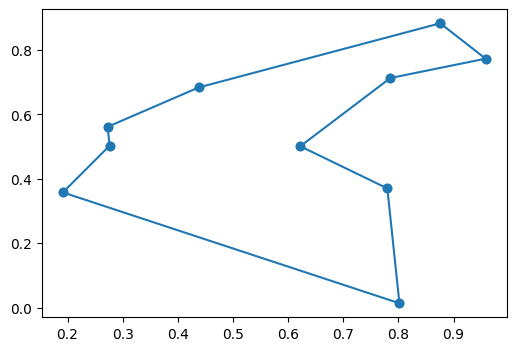

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from scipy.spatial.distance import pdist, squareform
import itertools
import time

# Set display options for numpy and pandas for cleaner output
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

# Make the results repeatable by setting a random seed
np.random.seed(1234)
random.seed(1234)

def random_tour(n):
    tour = list(range(n))
    random.shuffle(tour)
    return tour

def random_tsp(n):
    pos = pd.DataFrame({
        "x": np.random.uniform(size=n),
        "y": np.random.uniform(size=n)
    })
    dist = squareform(pdist(pos))
    return {"pos": pos, "dist": dist}

def tour_length(tsp, tour):
    # Make sure tour is a Python list
    if not isinstance(tour, list):
        tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    # Sum distances between consecutive cities
    for i in range(len(tour) - 1):
        tl += dist[tour[i], tour[i+1]]

    # Add the distance from the last city back to the first
    tl += dist[tour[-1], tour[0]]

    return tl

def show_tsp(tsp, tour=None):
    pos = tsp["pos"]
    plt.figure(figsize=(6, 4))
    plt.scatter(pos["x"], pos["y"])

    if tour is not None:
        # Make sure tour is a Python list
        if not isinstance(tour, list):
            tour = tour.tolist()

        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")

        # Reorder positions based on the tour and add the starting point at the end to close the loop
        pos_ = pos.reindex(tour)
        # append is deprecated in newer pandas; use pd.concat for compatibility
        pos_ = pd.concat([pos_, pos_.head(1)])
        plt.plot(pos_["x"].values, pos_["y"].values, '-o')

    plt.show()


def steepest_ascent_hill_climbing(tsp, initial_tour):
    current_tour = list(initial_tour)
    n = len(current_tour)

    while True:
        current_length = tour_length(tsp, current_tour)
        best_neighbor = current_tour
        best_neighbor_length = current_length

        # Generate all possible pairs of cities to swap
        for i, j in itertools.combinations(range(n), 2):
            neighbor = list(current_tour)
            # Swap two cities to create a neighbor
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

            neighbor_length = tour_length(tsp, neighbor)

            # If this neighbor is better than the best one found so far, update
            if neighbor_length < best_neighbor_length:
                best_neighbor = neighbor
                best_neighbor_length = neighbor_length

        # If we found a better neighbor, move to it. Otherwise, we are at a local optimum.
        if best_neighbor_length < current_length:
            current_tour = best_neighbor
        else:
            # No improvement found, so the search ends.
            break

    return current_tour


def random_restarts_hill_climbing(tsp, restarts=10):
    # Fix indentation and initialize best variables at same level
    best_overall_tour = None
    best_overall_length = float('inf')

    n_cities = len(tsp['pos'])

    for i in range(restarts):
        # 1. Generate a new random starting tour
        initial_tour = random_tour(n_cities)
        initial_length = tour_length(tsp, initial_tour)

        # 2. Run steepest-ascent hill climbing from this start
        local_optimum_tour = steepest_ascent_hill_climbing(tsp, initial_tour)
        local_optimum_length = tour_length(tsp, local_optimum_tour)

        print(f"Restart {i+1}/{restarts}: Start Length = {initial_length:.2f}, Found Local Optimum Length = {local_optimum_length:.2f}")

        # 3. Compare with the best solution found so far
        if local_optimum_length < best_overall_length:
            best_overall_tour = local_optimum_tour
            best_overall_length = local_optimum_length
            print(f"  -> New best tour found with length: {best_overall_length:.2f}")

    return best_overall_tour, best_overall_length


# --- Main execution block to demonstrate the algorithm ---

# Create the same 10-city problem from the notebook
tsp = random_tsp(10)

# Define the number of restarts
num_restarts = 10

# Run the algorithm
print(f"Starting Steepest-Ascent Hill Climbing with {num_restarts} Random Restarts...")
start_time = time.time()
best_tour_found, best_length = random_restarts_hill_climbing(tsp, restarts=num_restarts)
end_time = time.time()
print(f"\nSearch finished in {end_time - start_time:.4f} seconds.")

# Show the best tour found
print("\n--- Best Overall Tour ---")
print(f"Best tour length: {best_length:.2f}")
show_tsp(tsp, best_tour_found)


## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

Độ dài hành trình cuối cùng: 2.81
Tour length: 2.81


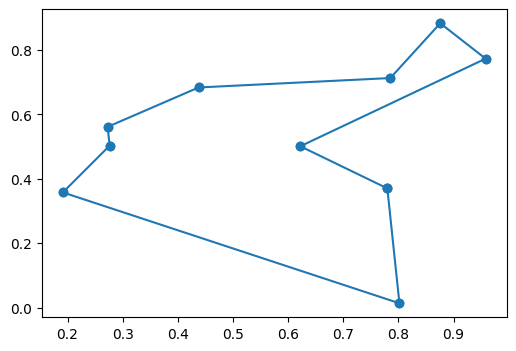

In [ ]:
def stochastic_hill_climb(tsp, max_iterations=1000):
    """
    Stochastic Hill Climbing cho bài toán TSP
    - Ngẫu nhiên chọn một bước đi “lên dốc” (cải thiện) trong tất cả các hoán đổi hai thành phố có thể
    """
    n = len(tsp["dist"])
    current_tour = random_tour(n)
    current_length = tour_length(tsp, current_tour)

    for _ in range(max_iterations):
        neighbors = []
        lengths = []

        # Sinh tất cả các hàng xóm có thể bằng cách hoán đổi hai thành phố
        for i in range(n - 1):
            for j in range(i + 1, n):
                new_tour = current_tour.copy()
                new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
                new_length = tour_length(tsp, new_tour)
                if new_length < current_length:  # bước đi “lên dốc” (tốt hơn)
                    neighbors.append(new_tour)
                    lengths.append(new_length)

        # Không còn hàng xóm nào tốt hơn → đạt cực trị cục bộ
        if not neighbors:
            break

        # Chọn ngẫu nhiên một hàng xóm tốt hơn trong danh sách
        idx = random.randint(0, len(neighbors) - 1)
        current_tour = neighbors[idx]
        current_length = lengths[idx]

    return current_tour, current_length


# Chạy thuật toán Stochastic Hill Climbing
best_tour, best_length = stochastic_hill_climb(tsp, max_iterations=1000)

print(f"Độ dài hành trình cuối cùng: {round(best_length, 2)}")
show_tsp(tsp, best_tour)


## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

Solving TSP for 20 cities.
City locations (no tour):


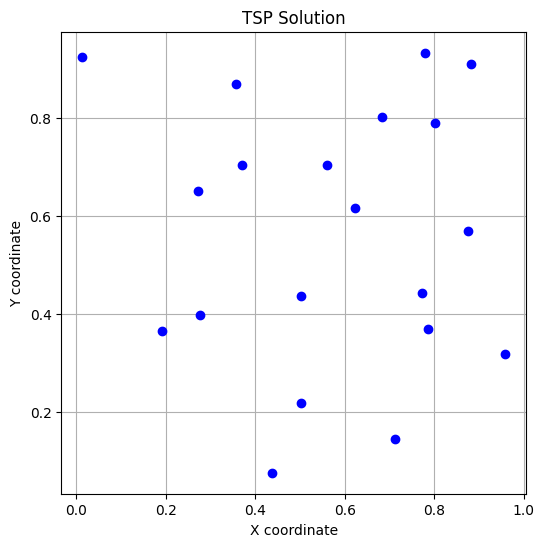


--- Running First-choice Hill Climbing ---
Initial random tour length: 11.34
Local optimum found after 29 iterations.

--- Results ---
Algorithm finished in 0.0061 seconds.
Final tour: [0, 6, 11, 12, 4, 19, 7, 8, 13, 2, 16, 3, 18, 9, 1, 15, 10, 17, 14, 5]
Tour length: 4.74


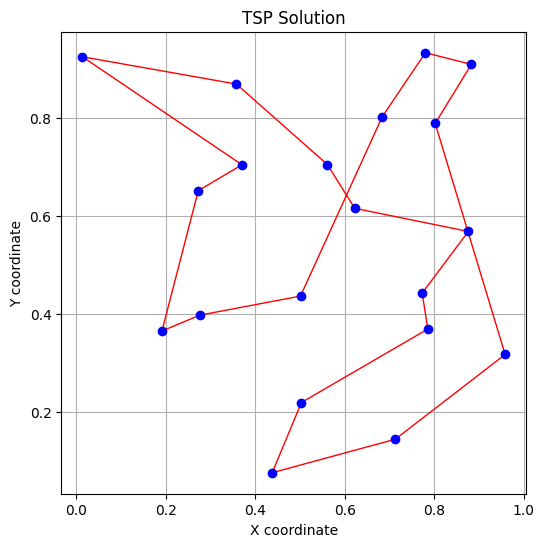

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from scipy.spatial.distance import pdist, squareform
import copy
import time

# --- Configuration for output ---
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

# --- Make the results repeatable ---
np.random.seed(1234)
random.seed(1234)


def random_tour(n):
    tour = list(range(n))
    random.shuffle(tour)
    return tour


def random_tsp(n):
    pos = pd.DataFrame({
        "x": np.random.uniform(size=n),
        "y": np.random.uniform(size=n)
    })
    dist = squareform(pdist(pos, 'euclidean'))
    return {"pos": pos, "dist": dist}


def tour_length(tsp, tour):
    # Make sure tour is a Python list
    if not isinstance(tour, list):
        tour = tour.tolist()

    tl = 0
    dist_matrix = tsp["dist"]
    n = len(tour)

    for i in range(n - 1):
        tl += dist_matrix[tour[i], tour[i+1]]

    # Add distance from the last city back to the first
    tl += dist_matrix[tour[n-1], tour[0]]
    return tl


def show_tsp(tsp, tour=None):
    pos = tsp["pos"]
    plt.figure(figsize=(6, 6))
    plt.scatter(pos["x"], pos["y"], color='blue', zorder=5)

    if tour is not None:
        # Make sure tour is a Python list
        if not isinstance(tour, list):
            tour = tour.tolist()

        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")

        # Reorder positions based on the tour and add the starting city at the end to close the loop
        pos_ = pos.reindex(tour)
        pos_ = pd.concat([pos_, pos_.head(1)])
        plt.plot(pos_["x"], pos_["y"], color='red', linewidth=1)

    plt.title("TSP Solution")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.grid(True)
    plt.show()

def first_choice_hill_climbing(tsp, max_iterations=1000, max_attempts_per_step=100):
    num_cities = len(tsp["pos"])

    # 1. Start with a random tour
    current_tour = random_tour(num_cities)
    current_length = tour_length(tsp, current_tour)

    print(f"Initial random tour length: {current_length:.2f}")

    # 2. Main loop
    for i in range(max_iterations):
        improved = False
        # 3. Try to find a better neighbor
        for _ in range(max_attempts_per_step):
            # Generate a random neighbor by swapping two cities
            neighbor_tour = copy.deepcopy(current_tour)
            # Pick two distinct random indices to swap
            idx1, idx2 = random.sample(range(num_cities), 2)
            neighbor_tour[idx1], neighbor_tour[idx2] = neighbor_tour[idx2], neighbor_tour[idx1]

            neighbor_length = tour_length(tsp, neighbor_tour)

            # 4. If the neighbor is better, accept it as the "first choice"
            if neighbor_length < current_length:
                current_tour = neighbor_tour
                current_length = neighbor_length
                improved = True
                break  # Stop searching for neighbors and move to the next iteration

        # 5. If no improvement was found after max_attempts, we are at a local optimum
        if not improved:
            print(f"Local optimum found after {i+1} iterations.")
            break

    return current_tour, current_length

num_cities = 20
tsp_problem = random_tsp(num_cities)

# --- Show the initial city layout ---
print(f"Solving TSP for {num_cities} cities.")
print("City locations (no tour):")
show_tsp(tsp_problem)


# --- Solve the TSP using First-choice Hill Climbing ---
print("\n--- Running First-choice Hill Climbing ---")
start_time = time.time()
best_tour, best_length = first_choice_hill_climbing(tsp_problem, max_iterations=5000, max_attempts_per_step=200)
end_time = time.time()

# --- Print and visualize the results ---
print("\n--- Results ---")
print(f"Algorithm finished in {(end_time - start_time):.4f} seconds.")
print(f"Final tour: {best_tour}")
show_tsp(tsp_problem, best_tour)


## Simulated Annealing [2 Points]

Độ dài hành trình tốt nhất (Simulated Annealing): 2.76
Tour length: 2.76


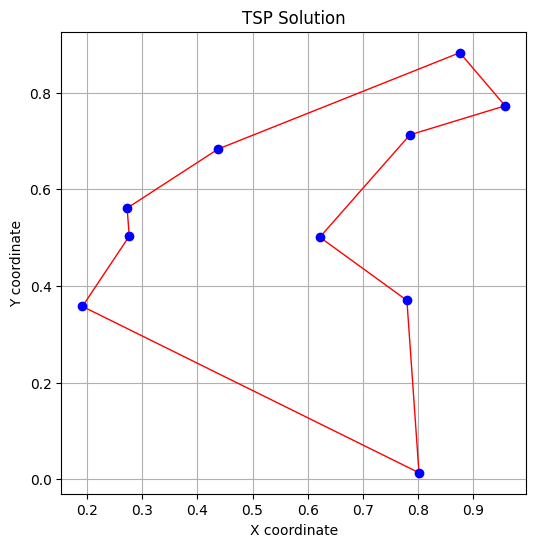

In [ ]:
import math
import random

def simulated_annealing(tsp, max_iterations=10000, start_temp=100, alpha=0.995, min_temp=1e-3):
    """
    Thuật toán Simulated Annealing cho bài toán TSP
    - Có khả năng thoát khỏi cực trị cục bộ nhờ xác suất chấp nhận nghiệm xấu.

    Tham số:
    - max_iterations: số vòng lặp tối đa
    - start_temp: nhiệt độ ban đầu
    - alpha: hệ số giảm nhiệt (0 < alpha < 1)
    - min_temp: nhiệt độ dừng
    """
    n = len(tsp["dist"])
    current_tour = random_tour(n)
    current_length = tour_length(tsp, current_tour)

    best_tour = current_tour.copy()
    best_length = current_length

    T = start_temp  # khởi tạo nhiệt độ

    for _ in range(max_iterations):
        # sinh lân cận bằng cách hoán đổi hai thành phố
        i, j = random.sample(range(n), 2)
        new_tour = current_tour.copy()
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
        new_length = tour_length(tsp, new_tour)

        delta = new_length - current_length

        # Nếu tốt hơn → chấp nhận luôn
        # Nếu tệ hơn → chấp nhận với xác suất e^(-Δ/T)
        if delta < 0 or random.random() < math.exp(-delta / T):
            current_tour = new_tour
            current_length = new_length

            # cập nhật nghiệm tốt nhất
            if current_length < best_length:
                best_tour = current_tour.copy()
                best_length = current_length

        # làm nguội (giảm nhiệt độ)
        T *= alpha
        if T < min_temp:
            break

    return best_tour, best_length


# 🔹 Chạy thuật toán Simulated Annealing
best_tour, best_length = simulated_annealing(tsp, max_iterations=10000, start_temp=100, alpha=0.995)

print(f"Độ dài hành trình tốt nhất (Simulated Annealing): {round(best_length, 2)}")
show_tsp(tsp, best_tour)


| Thành phần                   | Ý nghĩa                                              |
| ---------------------------- | ---------------------------------------------------- |
| `T`                          | Nhiệt độ – điều khiển xác suất chấp nhận nghiệm xấu  |
| `alpha`                      | Hệ số làm nguội (ví dụ 0.99 → nhiệt độ giảm chậm)    |
| `exp(-Δ/T)`                  | Xác suất chấp nhận nghiệm tệ hơn                     |
| `random.sample(range(n), 2)` | Chọn ngẫu nhiên hai vị trí để hoán đổi               |
| `best_tour`                  | Lưu nghiệm tốt nhất tìm được trong toàn bộ quá trình |


## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [ ]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.10752677917480469 milliseconds


In [ ]:
# Code and results go here
# traveling_salesman_compare.py
# -*- coding: utf-8 -*-
"""
So sánh hiệu suất (runtime, scalability, best objective) giữa
- Steepest-ascent hill climbing (best-improvement swap)
- Stochastic hill climbing (randomly choose among improving swaps)

Sử dụng: python traveling_salesman_compare.py
Hoặc copy vào một notebook cell và chạy.
"""

import time
import random
import math
import statistics
import csv

# ----------------------------
# Utils: tạo dữ liệu TSP
# ----------------------------
def euclidean_distance(a, b):
    return math.hypot(a[0] - b[0], a[1] - b[1])

def generate_random_points(n, seed=None, scale=100.0):
    if seed is not None:
        random.seed(seed)
    return [(random.random() * scale, random.random() * scale) for _ in range(n)]

def build_distance_matrix(points):
    n = len(points)
    D = [[0.0]*n for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            d = euclidean_distance(points[i], points[j])
            D[i][j] = d
            D[j][i] = d
    return D

def tour_length(tour, D):
    # tour: list of city indices in visiting order
    n = len(tour)
    total = 0.0
    for i in range(n):
        a = tour[i]
        b = tour[(i+1) % n]
        total += D[a][b]
    return total

def random_tour(n, seed=None):
    tour = list(range(n))
    if seed is not None:
        random.seed(seed)
    random.shuffle(tour)
    return tour

# ----------------------------
# Local moves: swap two positions
# ----------------------------
def all_swap_neighbors(tour):
    # yield pairs of indices to swap (i,j) with i < j
    n = len(tour)
    for i in range(n-1):
        for j in range(i+1, n):
            yield i, j

def swap_positions(tour, i, j):
    new = tour[:]  # shallow copy
    new[i], new[j] = new[j], new[i]
    return new

# ----------------------------
# Hill climbing algorithms
# ----------------------------
def steepest_ascent_hill_climbing(initial_tour, D, max_iters=10_000):
    """
    At each iteration, try all swaps and pick the one that gives the best reduction
    (best-improvement). Stop when no improving swap exists.
    Returns: best_tour, best_cost, runtime_seconds, iterations
    """
    t0 = time.time()
    tour = initial_tour[:]
    best_cost = tour_length(tour, D)
    n_iter = 0
    n = len(tour)
    improved = True

    while improved and n_iter < max_iters:
        n_iter += 1
        improved = False
        best_local_cost = best_cost
        best_swap = None

        # Try all swaps
        for i, j in all_swap_neighbors(tour):
            # compute cost of swapped tour quickly by constructing swapped tour
            # For simplicity and clarity, compute full cost (O(n)) per neighbor:
            candidate = swap_positions(tour, i, j)
            c = tour_length(candidate, D)
            if c < best_local_cost - 1e-12:
                best_local_cost = c
                best_swap = (i, j)

        if best_swap is not None:
            # apply best swap
            tour = swap_positions(tour, best_swap[0], best_swap[1])
            best_cost = best_local_cost
            improved = True

    t1 = time.time()
    return tour, best_cost, (t1 - t0), n_iter

def stochastic_hill_climbing(initial_tour, D, max_iters=10_000, rng=None):
    """
    At each iteration, collect all improving swaps (those that reduce cost),
    then choose one uniformly at random and apply it.
    Stop when no improving swap exists.
    """
    if rng is None:
        rng = random
    t0 = time.time()
    tour = initial_tour[:]
    best_cost = tour_length(tour, D)
    n_iter = 0
    n = len(tour)
    improved = True

    while improved and n_iter < max_iters:
        n_iter += 1
        improving_swaps = []

        for i, j in all_swap_neighbors(tour):
            candidate = swap_positions(tour, i, j)
            c = tour_length(candidate, D)
            if c < best_cost - 1e-12:
                improving_swaps.append((i, j, c))

        if not improving_swaps:
            improved = False
        else:
            # choose one at random
            i, j, c = rng.choice(improving_swaps)
            tour = swap_positions(tour, i, j)
            best_cost = c

    t1 = time.time()
    return tour, best_cost, (t1 - t0), n_iter

# ----------------------------
# Experiment runner
# ----------------------------
def run_experiment(sizes, algorithms, trials=5, seed_base=0):
    """
    sizes: list of n (number of cities) to test
    algorithms: dict of {'name': func} where func(initial_tour, D) -> (tour, cost, runtime, iters)
    trials: number of random instances/trials per size per algorithm
    Returns results: list of dicts
    """
    results = []
    for n in sizes:
        print(f"\n=== Running size n={n} ===")
        for t in range(trials):
            seed = seed_base + t
            points = generate_random_points(n, seed=seed)
            D = build_distance_matrix(points)
            init_tour = random_tour(n, seed=seed+1000)  # different seed for init

            for alg_name, alg_func in algorithms.items():
                # make a copy of initial tour for fairness
                tour_copy = init_tour[:]
                # run
                tour_res, cost_res, runtime_res, iters_res = alg_func(tour_copy, D)
                res = {
                    'algorithm': alg_name,
                    'n': n,
                    'trial': t,
                    'cost': cost_res,
                    'runtime_sec': runtime_res,
                    'iterations': iters_res
                }
                results.append(res)
                print(f"[n={n} t={t}] {alg_name}: cost={cost_res:.3f}, time={runtime_res*1e3:.2f} ms, iters={iters_res}")
    return results

# ----------------------------
# Reporting helpers
# ----------------------------
def summarize_results(results):
    # produce aggregated summaries per (algorithm, n)
    summary = {}
    for r in results:
        key = (r['algorithm'], r['n'])
        if key not in summary:
            summary[key] = {'costs': [], 'times': [], 'iters': []}
        summary[key]['costs'].append(r['cost'])
        summary[key]['times'].append(r['runtime_sec'])
        summary[key]['iters'].append(r['iterations'])

    rows = []
    for (alg, n), v in sorted(summary.items(), key=lambda x:(x[0][0], x[0][1])):
        row = {
            'algorithm': alg,
            'n': n,
            'trials': len(v['costs']),
            'cost_mean': statistics.mean(v['costs']),
            'cost_std': statistics.stdev(v['costs']) if len(v['costs'])>1 else 0.0,
            'time_mean_ms': statistics.mean(v['times']) * 1e3,
            'time_std_ms': statistics.stdev(v['times']) * 1e3 if len(v['times'])>1 else 0.0,
            'iters_mean': statistics.mean(v['iters']),
            'iters_std': statistics.stdev(v['iters']) if len(v['iters'])>1 else 0.0
        }
        rows.append(row)
    return rows

def print_summary_table(rows):
    print("\n=== Summary ===")
    print(f"{'Alg':25s} {'n':>4s} {'trials':>6s} {'cost_mean':>12s} {'cost_std':>10s} {'time_mean(ms)':>14s} {'time_std(ms)':>12s} {'iters_mean':>11s}")
    for r in rows:
        print(f"{r['algorithm']:25s} {r['n']:4d} {r['trials']:6d} {r['cost_mean']:12.3f} {r['cost_std']:10.3f} {r['time_mean_ms']:14.2f} {r['time_std_ms']:12.2f} {r['iters_mean']:11.2f}")

def save_results_csv(rows, filename="tsp_compare_results.csv"):
    fieldnames = ['algorithm','n','trials','cost_mean','cost_std','time_mean_ms','time_std_ms','iters_mean','iters_std']
    with open(filename, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        for r in rows:
            out = r.copy()
            out['time_mean_ms'] = round(out['time_mean_ms'], 6)
            out['time_std_ms'] = round(out['time_std_ms'], 6)
            writer.writerow(out)
    print(f"Saved summary CSV to {filename}")

# ----------------------------
# Main: cấu hình và chạy
# ----------------------------
if __name__ == "__main__":
    # cấu hình thí nghiệm
    sizes = [20, 50, 100]         # số lượng thành phố -> thay đổi để quan sát scalability
    trials = 5                    # số lần chạy cho mỗi size
    algorithms = {
        'SteepestAscent': steepest_ascent_hill_climbing,
        'StochasticHC': stochastic_hill_climbing
    }

    results = run_experiment(sizes, algorithms, trials=trials, seed_base=42)
    rows = summarize_results(results)
    print_summary_table(rows)
    save_results_csv(rows, filename="tsp_compare_results.csv")

    # Gợi ý: để vẽ biểu đồ, bạn có thể load CSV bằng pandas và plot (n vs time / cost)
    # (Nếu cần, mình có thể bổ sung mã vẽ)



=== Running size n=20 ===
[n=20 t=0] SteepestAscent: cost=473.771, time=3.50 ms, iters=12
[n=20 t=0] StochasticHC: cost=423.556, time=9.85 ms, iters=33
[n=20 t=1] SteepestAscent: cost=464.190, time=3.56 ms, iters=12
[n=20 t=1] StochasticHC: cost=513.308, time=7.64 ms, iters=26
[n=20 t=2] SteepestAscent: cost=499.279, time=5.19 ms, iters=18
[n=20 t=2] StochasticHC: cost=549.958, time=7.30 ms, iters=25
[n=20 t=3] SteepestAscent: cost=418.049, time=5.18 ms, iters=18
[n=20 t=3] StochasticHC: cost=463.558, time=8.74 ms, iters=30
[n=20 t=4] SteepestAscent: cost=536.526, time=4.00 ms, iters=14
[n=20 t=4] StochasticHC: cost=488.646, time=7.91 ms, iters=27

=== Running size n=50 ===
[n=50 t=0] SteepestAscent: cost=739.748, time=214.36 ms, iters=50
[n=50 t=0] StochasticHC: cost=775.617, time=495.89 ms, iters=115
[n=50 t=1] SteepestAscent: cost=833.910, time=172.38 ms, iters=41
[n=50 t=1] StochasticHC: cost=845.121, time=431.04 ms, iters=102
[n=50 t=2] SteepestAscent: cost=796.403, time=254.03 m

## Bonus: Genetic Algorithm [+1 Point]

Gen 000: best cost = 3.507862
Gen 020: best cost = 2.857951
Gen 040: best cost = 2.822090
Gen 060: best cost = 2.763574
Gen 080: best cost = 2.763574
Gen 100: best cost = 2.763574
Gen 120: best cost = 2.763574
Gen 140: best cost = 2.763574
Gen 160: best cost = 2.763574
Gen 180: best cost = 2.763574
Gen 199: best cost = 2.763574

--- GA result ---
Best GA tour: [9, 8, 3, 1, 4, 7, 0, 6, 5, 2]
Tour length: 2.763574
Runtime: 337.57 ms
Tour length: 2.7636


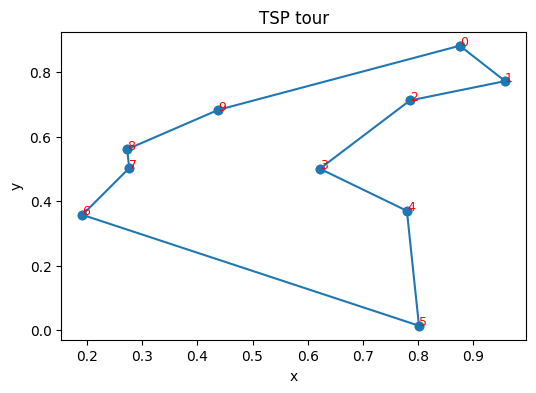

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import itertools
import time
from scipy.spatial.distance import pdist, squareform

# -------------------------
# Utilities and TSP helpers
# -------------------------
np.random.seed(1234)
random.seed(1234)
pd.set_option('display.precision', 2)

def random_tour(n):
    tour = list(range(n))
    random.shuffle(tour)
    return tour

def random_tsp(n):
    pos = pd.DataFrame({
        "x": np.random.uniform(size=n),
        "y": np.random.uniform(size=n)
    })
    dist = squareform(pdist(pos.values))  # numpy 2D array
    return {"pos": pos, "dist": dist}

def tour_length(tsp, tour):
    """Trả về độ dài tour. Đảm bảo tour là list các chỉ số 0..n-1."""
    if not isinstance(tour, list):
        tour = list(tour)
    D = tsp["dist"]
    n = len(tour)
    total = 0.0
    for i in range(n):
        a = tour[i]
        b = tour[(i+1) % n]
        total += D[a, b]
    return float(total)

def show_tsp(tsp, tour=None):
    pos = tsp["pos"]
    plt.figure(figsize=(6, 4))
    plt.scatter(pos["x"], pos["y"])
    if tour is not None:
        if not isinstance(tour, list):
            tour = list(tour)
        print(f"Tour length: {tour_length(tsp, tour):.4f}")
        pos_ = pos.reindex(tour)
        pos_ = pd.concat([pos_, pos_.head(1)])  # compatible with pandas >=2.0
        plt.plot(pos_["x"].values, pos_["y"].values, marker='o')
        # annotate order
        for idx, (x,y) in enumerate(pos_.iloc[:-1].values):
            plt.text(x, y, str(idx), fontsize=9, color='red')
    plt.title("TSP tour")
    plt.xlabel("x"); plt.ylabel("y")
    plt.show()

# -------------------------
# Genetic Algorithm parts
# -------------------------
def create_population(tsp, size):
    n = len(tsp["pos"])
    return [random_tour(n) for _ in range(size)]

def crossover(parent1, parent2):
    """Order crossover (OX) style — safe, returns a full permutation."""
    n = len(parent1)
    a, b = sorted(random.sample(range(n), 2))
    child = [-1] * n
    # copy segment from parent1
    child[a:b+1] = parent1[a:b+1]
    # fill remaining positions with order from parent2
    p2_idx = 0
    for i in range(n):
        pos = (b + 1 + i) % n
        if child[pos] == -1:
            # find next city from parent2 not yet in child
            while parent2[p2_idx] in child:
                p2_idx += 1
            child[pos] = parent2[p2_idx]
            p2_idx += 1
    return child

def mutate(tour, rate=0.1):
    """Simple swap mutation. rate is fraction of n => number of swaps = max(1,int(rate*n))."""
    n = len(tour)
    swaps = max(1, int(rate * n))
    for _ in range(swaps):
        i, j = random.sample(range(n), 2)
        tour[i], tour[j] = tour[j], tour[i]
    return tour

def genetic_algorithm_tsp(tsp, pop_size=50, generations=200, mutation_rate=0.1, elite_frac=0.2, verbose=False):
    """Return best_tour, best_cost."""
    # sanity
    n = len(tsp["pos"])
    if pop_size < 4:
        raise ValueError("pop_size should be >= 4")
    population = create_population(tsp, pop_size)

    def tour_cost(t):
        return tour_length(tsp, t)

    # evaluate initial best
    best_tour = min(population, key=tour_cost)
    best_cost = tour_cost(best_tour)

    elite_size = max(1, int(pop_size * elite_frac))

    for g in range(generations):
        # rank population by cost (ascending)
        population.sort(key=tour_cost)
        # keep elites
        new_pop = population[:elite_size]

        # produce children until population full
        while len(new_pop) < pop_size:
            p1, p2 = random.sample(population[:pop_size//2], 2)  # select parents from top half
            child = crossover(p1, p2)
            child = mutate(child, rate=mutation_rate)
            new_pop.append(child)

        population = new_pop

        # update best
        current_best = min(population, key=tour_cost)
        current_cost = tour_cost(current_best)
        if current_cost < best_cost:
            best_tour, best_cost = current_best.copy(), current_cost

        if verbose and (g % 20 == 0 or g == generations-1):
            print(f"Gen {g:03d}: best cost = {best_cost:.6f}")

    return best_tour, best_cost

# -------------------------
# Test GA
# -------------------------
tsp = random_tsp(10)
start = time.time()
ga_tour, ga_cost = genetic_algorithm_tsp(tsp, pop_size=60, generations=200, mutation_rate=0.12, verbose=True)
end = time.time()

print("\n--- GA result ---")
print(f"Best GA tour: {ga_tour}")
print(f"Tour length: {ga_cost:.6f}")
print(f"Runtime: {(end - start)*1000:.2f} ms")

show_tsp(tsp, ga_tour)
